In [50]:
from enum import Enum
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

In [51]:
class StrEnum(str, Enum):
    def _generate_next_value_(name, start, count, last_values):
        return name

    def __repr__(self):
        return self.value

    def __str__(self):
        return self.value

In [52]:
class CodeD(StrEnum):
    L = "속성 D 대분류코드"
    M = "속성 D 중분류코드"
    S = "속성 D 소분류코드"
    XS = "속성 D 세분류코드"

In [53]:
class CodeH(StrEnum):
    L = "속성 H 대분류코드"
    M = "속성 H 중분류코드"

In [54]:
class CodeL(StrEnum):
    L = "속성 L 대분류코드"
    M = "속성 L 중분류코드"
    S = "속성 L 소분류코드"
    XS = "속성 L 세분류코드"

In [68]:
def load_data():
    train = pd.read_csv("C:/Users/jlee0/Desktop/공모전/공모전/train.csv", encoding='UTF8')
    test = pd.read_csv("C:/Users/jlee0/Desktop/공모전/공모전/test.csv", encoding='UTF8')
    return train, test

In [69]:
def load_code():
    codeD = pd.read_csv("C:/Users/jlee0/Desktop/공모전/공모전/속성_D_코드.csv", index_col=0, encoding='UTF8').T.to_dict()
    codeH = pd.read_csv("C:/Users/jlee0/Desktop/공모전/공모전/속성_H_코드.csv", index_col=0, encoding='UTF8').T.to_dict()
    codeL = pd.read_csv("C:/Users/jlee0/Desktop/공모전/공모전/속성_L_코드.csv", index_col=0, encoding='UTF8').T.to_dict()
    return codeD, codeH, codeL

In [70]:
def add_subcode(df, codeD, codeH, codeL):
    df = df.copy()
    
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: codeD[x][CodeD.L])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: codeD[x][CodeD.M])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: codeD[x][CodeD.S])
    df['person_prefer_d_1_xs'] = df['person_prefer_d_1'].apply(lambda x: codeD[x][CodeD.XS])
    
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: codeD[x][CodeD.L])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: codeD[x][CodeD.M])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: codeD[x][CodeD.S])
    df['person_prefer_d_2_xs'] = df['person_prefer_d_2'].apply(lambda x: codeD[x][CodeD.XS])
    
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: codeD[x][CodeD.L])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: codeD[x][CodeD.M])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: codeD[x][CodeD.S])
    df['person_prefer_d_3_xs'] = df['person_prefer_d_3'].apply(lambda x: codeD[x][CodeD.XS])

    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: codeD[x][CodeD.L])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: codeD[x][CodeD.M])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: codeD[x][CodeD.S])
    df['contents_attribute_d_xs'] = df['contents_attribute_d'].apply(lambda x: codeD[x][CodeD.XS])
    
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: codeH[x][CodeH.L])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: codeH[x][CodeH.M])

    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: codeH[x][CodeH.L])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: codeH[x][CodeH.M])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: codeH[x][CodeH.L])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: codeH[x][CodeH.M])
    
    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: codeH[x][CodeH.L])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: codeH[x][CodeH.M])
    
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: codeL[x][CodeL.L])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: codeL[x][CodeL.M])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: codeL[x][CodeL.S])
    df['contents_attribute_l_xs'] = df['contents_attribute_l'].apply(lambda x: codeL[x][CodeL.XS])
    
    return df

In [71]:
def add_D_match(df):
    df = df.copy()
    df['d_1_l_match_yn'] = df['person_prefer_d_1_l'] == df['contents_attribute_d_l']
    df['d_1_m_match_yn'] = df['person_prefer_d_1_m'] == df['contents_attribute_d_m']
    df['d_1_s_match_yn'] = df['person_prefer_d_1_s'] == df['contents_attribute_d_s']
    df['d_1_xs_match_yn'] = df['person_prefer_d_1_xs'] == df['contents_attribute_d_xs']
    df['d_1_match_yn'] = df['person_prefer_d_1'] == df['contents_attribute_d']
    
    df['d_2_l_match_yn'] = df['person_prefer_d_2_l'] == df['contents_attribute_d_l']
    df['d_2_m_match_yn'] = df['person_prefer_d_2_m'] == df['contents_attribute_d_m']
    df['d_2_s_match_yn'] = df['person_prefer_d_2_s'] == df['contents_attribute_d_s']
    df['d_2_xs_match_yn'] = df['person_prefer_d_2_xs'] == df['contents_attribute_d_xs']
    df['d_2_match_yn'] = df['person_prefer_d_2'] == df['contents_attribute_d']
    
    df['d_3_l_match_yn'] = df['person_prefer_d_3_l'] == df['contents_attribute_d_l']
    df['d_3_m_match_yn'] = df['person_prefer_d_3_m'] == df['contents_attribute_d_m']
    df['d_3_s_match_yn'] = df['person_prefer_d_3_s'] == df['contents_attribute_d_s']
    df['d_3_xs_match_yn'] = df['person_prefer_d_3_xs'] == df['contents_attribute_d_xs']
    df['d_3_match_yn'] = df['person_prefer_d_3'] == df['contents_attribute_d']
    return df

In [72]:
def add_H_match(df):
    df = df.copy()
    df['h_1_l_match_yn'] = df['person_prefer_h_1_l'] == df['contents_attribute_h_l']
    df['h_1_m_match_yn'] = df['person_prefer_h_1_m'] == df['contents_attribute_h_m']
    df['h_1_match_yn'] = df['person_prefer_h_1'] == df['contents_attribute_h']
    
    df['h_2_l_match_yn'] = df['person_prefer_h_2_l'] == df['contents_attribute_h_l']
    df['h_2_m_match_yn'] = df['person_prefer_h_2_m'] == df['contents_attribute_h_m']
    df['h_2_match_yn'] = df['person_prefer_h_2'] == df['contents_attribute_h']
    
    df['h_3_l_match_yn'] = df['person_prefer_h_3_l'] == df['contents_attribute_h_l']
    df['h_3_m_match_yn'] = df['person_prefer_h_3_m'] == df['contents_attribute_h_m']
    df['h_3_match_yn'] = df['person_prefer_h_3'] == df['contents_attribute_h']
    return df

In [73]:
def add_E_abs(df):
    df = df.copy()
    df["e_abs"] = df.apply(lambda x: abs(x.person_prefer_e - x.contents_attribute_e), axis=1)
    return df

In [74]:
def encode_A(x):
    if x.contents_attribute_a == 3:
        return 2
    if x.person_attribute_a == x.contents_attribute_a:
        return 1
    return 0

def add_A_match(df):
    df = df.copy()
    df["a_match_ynx"] = df.apply(lambda x: encode_A(x), axis=1)
    
    return df


In [75]:
def add_C_match(df):
    df = df.copy()
    df['c_match_yn'] = df['person_prefer_c'] == df['contents_attribute_c']
    return df

In [76]:
def preprocess_bool(df):
    df = df.copy()
    for col in df.select_dtypes(include='bool').columns:
        df[col] = df[col].astype(int)
        
    return df

In [77]:
def preprocess_add_match_columns(df):
    df = (df.copy()
           .pipe(add_D_match)
           .pipe(add_H_match)
           .pipe(add_A_match)
           .pipe(add_C_match)
           .pipe(add_E_abs))
    return df

In [78]:
def preprocess(df):
    df = preprocess_add_match_columns(df)
    df = preprocess_bool(df)
    return df

In [79]:
def init_data():
    train, test = load_data()
    codeD, codeH, codeL = load_code()
    
    train = add_subcode(train, codeD, codeH, codeL)
    test = add_subcode(test, codeD, codeH, codeL)
    
    train_preprocessed = preprocess(train)
    test_preprocessed = preprocess(test)
    return train_preprocessed, test_preprocessed

In [80]:
train, test = init_data()

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 90 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id                       501951 non-null  int64 
 1   d_l_match_yn             501951 non-null  int32 
 2   d_m_match_yn             501951 non-null  int32 
 3   d_s_match_yn             501951 non-null  int32 
 4   h_l_match_yn             501951 non-null  int32 
 5   h_m_match_yn             501951 non-null  int32 
 6   h_s_match_yn             501951 non-null  int32 
 7   person_attribute_a       501951 non-null  int64 
 8   person_attribute_a_1     501951 non-null  int64 
 9   person_attribute_b       501951 non-null  int64 
 10  person_prefer_c          501951 non-null  int64 
 11  person_prefer_d_1        501951 non-null  int64 
 12  person_prefer_d_2        501951 non-null  int64 
 13  person_prefer_d_3        501951 non-null  int64 
 14  person_prefer_e     

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       46404 non-null  int64 
 1   d_l_match_yn             46404 non-null  int32 
 2   d_m_match_yn             46404 non-null  int32 
 3   d_s_match_yn             46404 non-null  int32 
 4   h_l_match_yn             46404 non-null  int32 
 5   h_m_match_yn             46404 non-null  int32 
 6   h_s_match_yn             46404 non-null  int32 
 7   person_attribute_a       46404 non-null  int64 
 8   person_attribute_a_1     46404 non-null  int64 
 9   person_attribute_b       46404 non-null  int64 
 10  person_prefer_c          46404 non-null  int64 
 11  person_prefer_d_1        46404 non-null  int64 
 12  person_prefer_d_2        46404 non-null  int64 
 13  person_prefer_d_3        46404 non-null  int64 
 14  person_prefer_e          46404 non-nul

In [83]:
train

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,h_1_match_yn,h_2_l_match_yn,h_2_m_match_yn,h_2_match_yn,h_3_l_match_yn,h_3_m_match_yn,h_3_match_yn,a_match_ynx,c_match_yn,e_abs
0,0,1,1,1,0,0,0,1,4,3,...,0,1,0,0,0,0,0,2,0,4
1,1,0,0,0,1,1,0,1,3,4,...,0,1,0,0,1,0,0,2,1,0
2,2,0,0,0,1,0,0,2,0,3,...,0,0,0,0,1,0,0,0,0,1
3,3,0,0,0,1,0,0,2,0,2,...,0,0,0,0,0,0,0,2,0,0
4,4,1,1,1,0,0,0,1,3,4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,0,0,0,1,0,0,1,1,2,...,0,0,0,0,0,0,0,2,0,2
501947,501947,1,1,0,1,0,0,1,6,2,...,0,1,1,1,1,0,0,2,1,0
501948,501948,1,1,1,1,0,0,1,7,4,...,0,0,0,0,0,0,0,1,1,3
501949,501949,1,0,0,1,0,0,1,1,2,...,0,0,0,0,1,0,0,0,1,0


In [85]:
train['d_2_s_match_yn']

array([0, 1])

In [97]:
train['contents_attribute_d_l'].unique()

array([ 216,    1,  482,  926,  744,  618,  522,  864,  377, 1235, 1258],
      dtype=int64)

# 상관계수 확인

순서형과 연속형 컬럼들을 스피어만 상관계수를 통해 확인해보겠다.

In [119]:
    metadata = pd.read_csv('C:/Users/jlee0/Desktop/공모전/공모전/metadata.csv')

    metadata

,columns,type
0,d_l_match_yn,bool
1,d_m_match_yn,bool
2,d_s_match_yn,bool
3,h_l_match_yn,bool
4,h_m_match_yn,bool
...,...,...
85,contents_attribute_h_m,nomial
86,contents_attribute_l_l,nomial
87,contents_attribute_l_m,nomial
88,contents_attribute_l_s,nomial


#### 순서형, 연속형 데이터

In [120]:
ordinal_data = metadata[(metadata.type == 'conti') | (metadata.type == 'ordinal')]

ordinal_data

,columns,type
6,person_attribute_a_1,ordinal
7,person_attribute_b,ordinal
8,contents_attribute_e,ordinal
9,person_prefer_e,ordinal
61,e_abs,conti


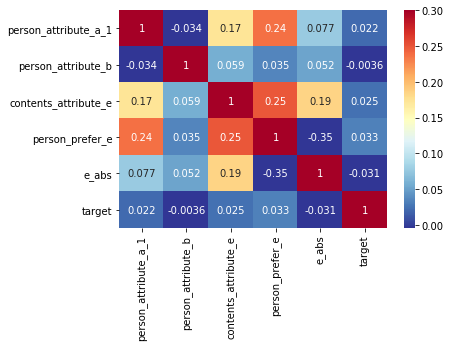

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = list(ordinal_data['columns'])
cols.append('target')

sns.heatmap(train[cols].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0040, vmax = 0.3)

사람들이 선호하는 컨텐츠일수록 컨텐스의 순서 값이 높다는 양의 상관관계를 확인할 수 있었지만, 강하지 않았다.

오히려 e_abs와 prefer_e와는 음의 상관관계를 띄고 있다.

target값과는 유의미한 상관관계를 갖는 컬럼이 확인되지 않는다.

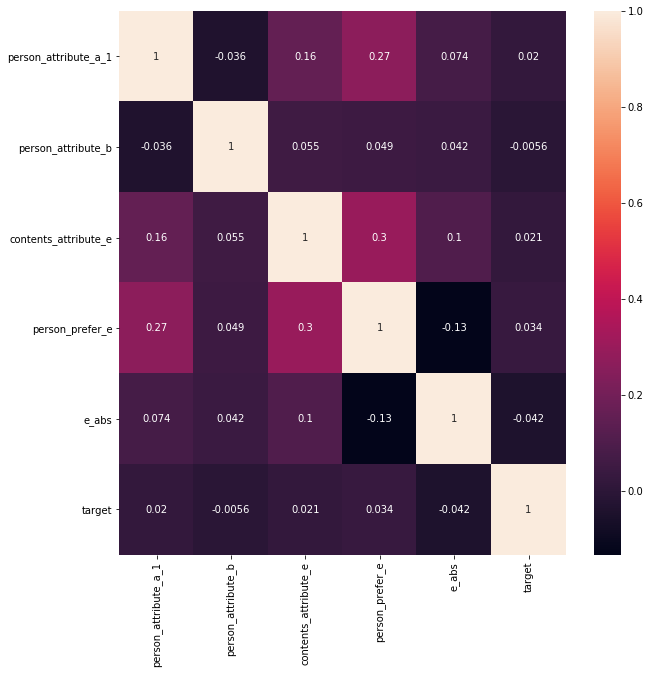

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = list(ordinal_data['columns'])
cols.append('target')
 
plt.figure(figsize=(10,10)) 
corr = train[cols].corr(method = 'spearman')

sns.heatmap(corr, annot = True)

plt.show()

#plt.figure(figsize=(30,30))
#sns.heatmap(train[cols].corr(),cmap = plt.cm.RdYlBu_r,fmt = '.2f', linewidths=.5, annot=True, vmin=-0.0040, vmax = 0.3)

#### 논리형 데이터

논리형 데이터의 경우 스피어만 상관분석을 통해서 확인해보았다.

In [122]:
bool_data = metadata[metadata.type == 'bool']

bool_data

,columns,type
0,d_l_match_yn,bool
1,d_m_match_yn,bool
2,d_s_match_yn,bool
3,h_l_match_yn,bool
4,h_m_match_yn,bool
5,h_s_match_yn,bool
35,d_1_l_match_yn,bool
36,d_1_m_match_yn,bool
37,d_1_s_match_yn,bool
38,d_1_xs_match_yn,bool


In [123]:
cols

['person_attribute_a_1',
 'person_attribute_b',
 'contents_attribute_e',
 'person_prefer_e',
 'e_abs',
 'target']

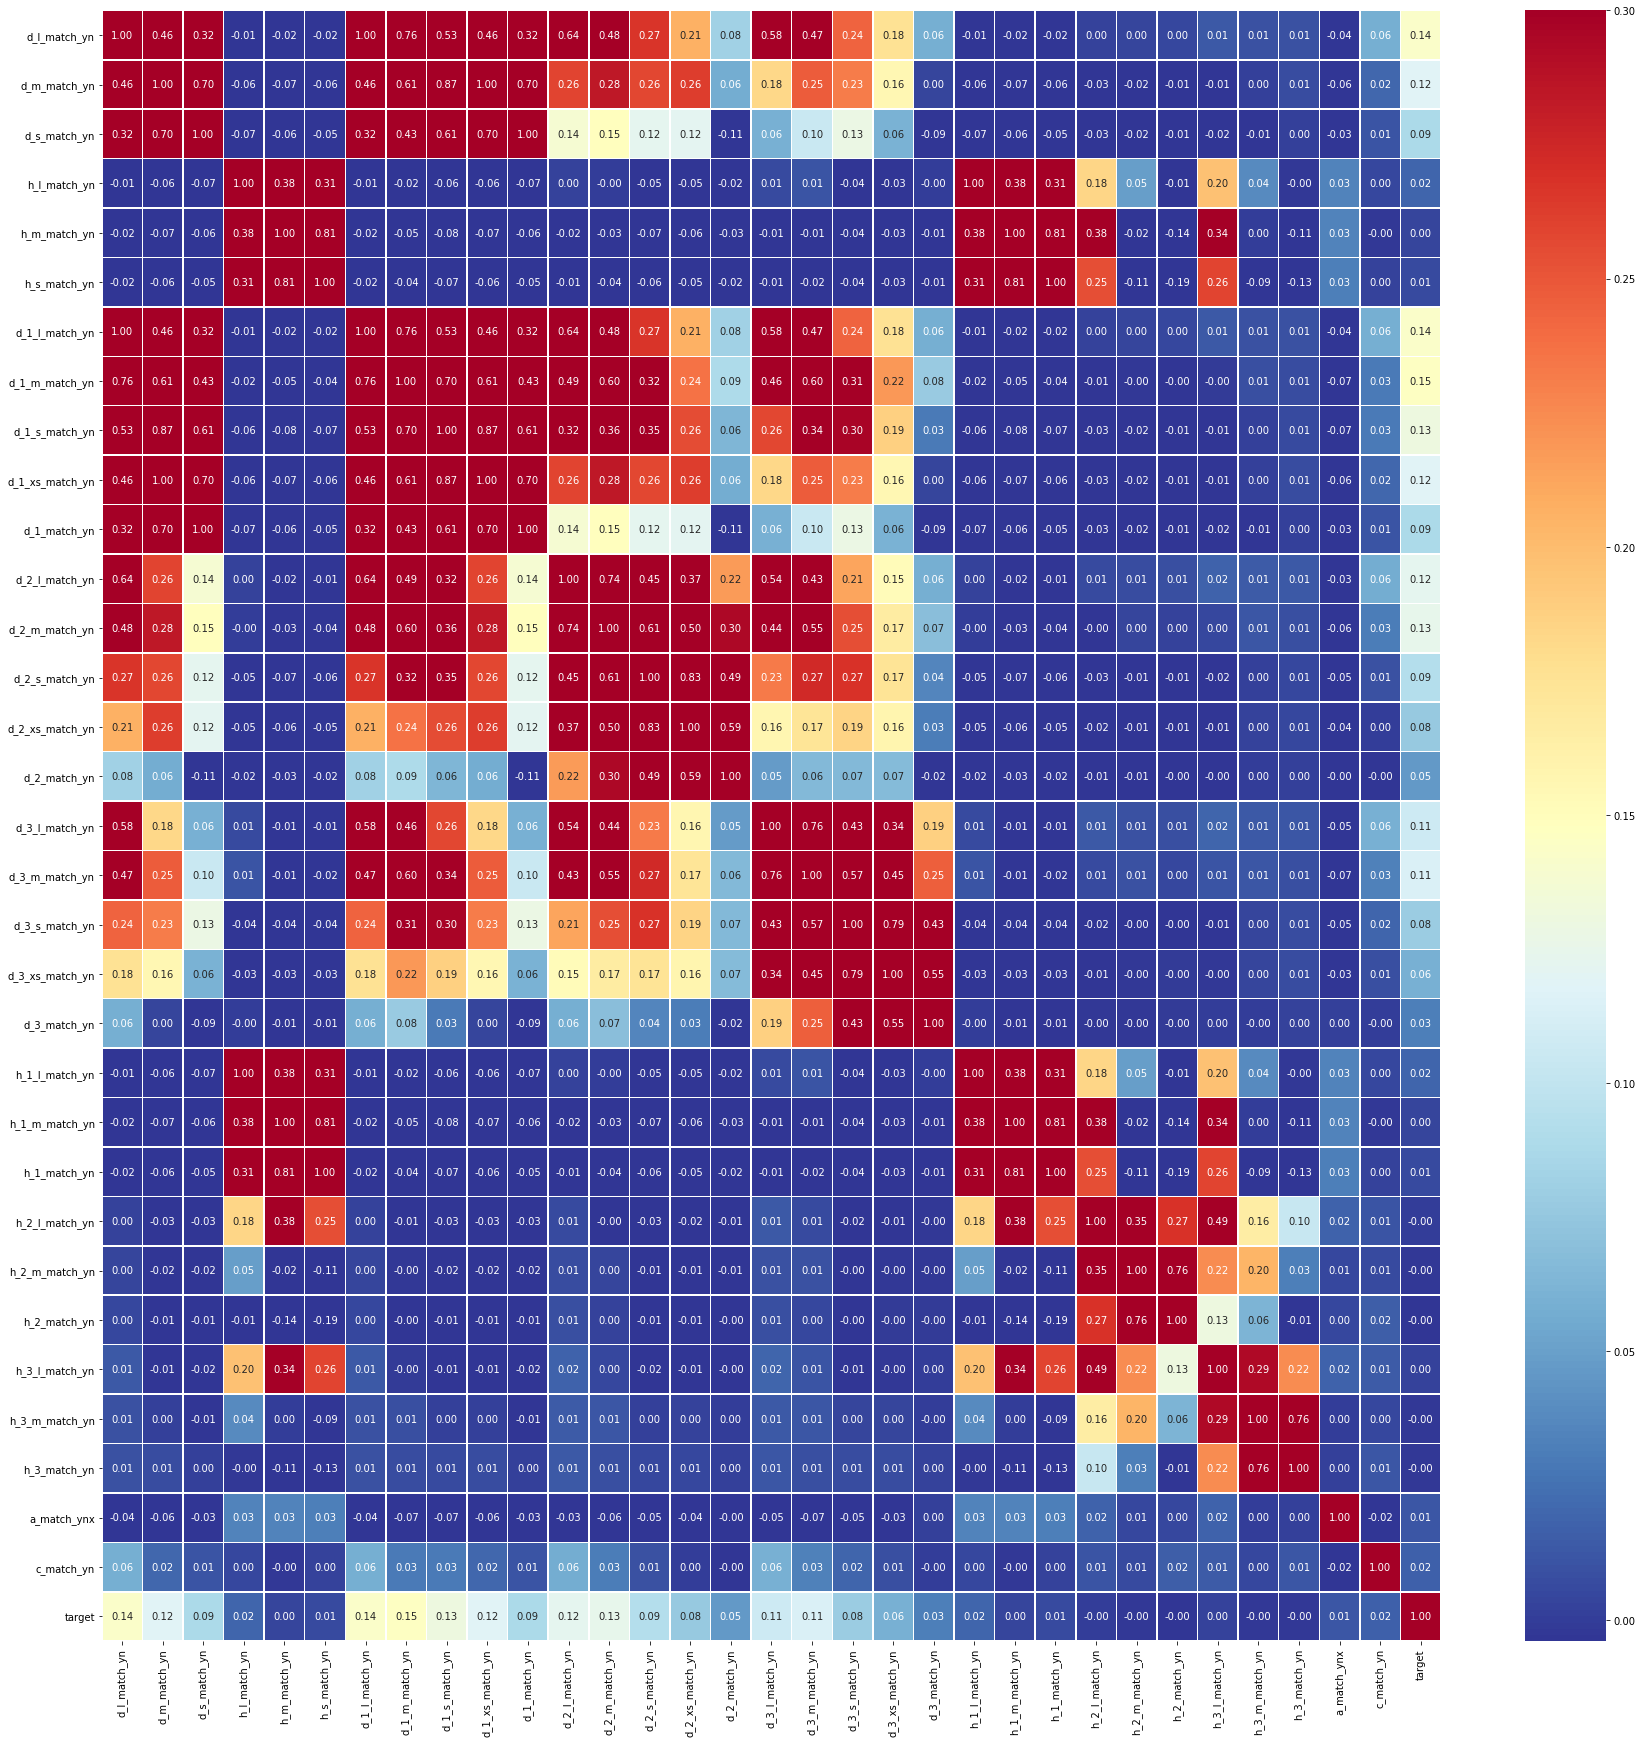

In [132]:
# 피어슨

import seaborn as sns
import matplotlib.pyplot as plt

cols = list(bool_data['columns'])
cols.append('target')
 
plt.figure(figsize=(30,30))
sns.heatmap(train[cols].corr(),cmap = plt.cm.RdYlBu_r,fmt = '.2f', linewidths=.5, annot=True, vmin=-0.0040, vmax = 0.3)

d,h 코드(대,중,소 어느 것이든)의 매칭 여부는 다른 d,h 코드의 매칭 여부와 상관관계가 높은 것으로 나타난다. 

--> 다중공산성을 일으킬 수 있는 부분이다.

* 이진 데이터에 대해서도 상관계수를 그릴 수 있는 지 확인

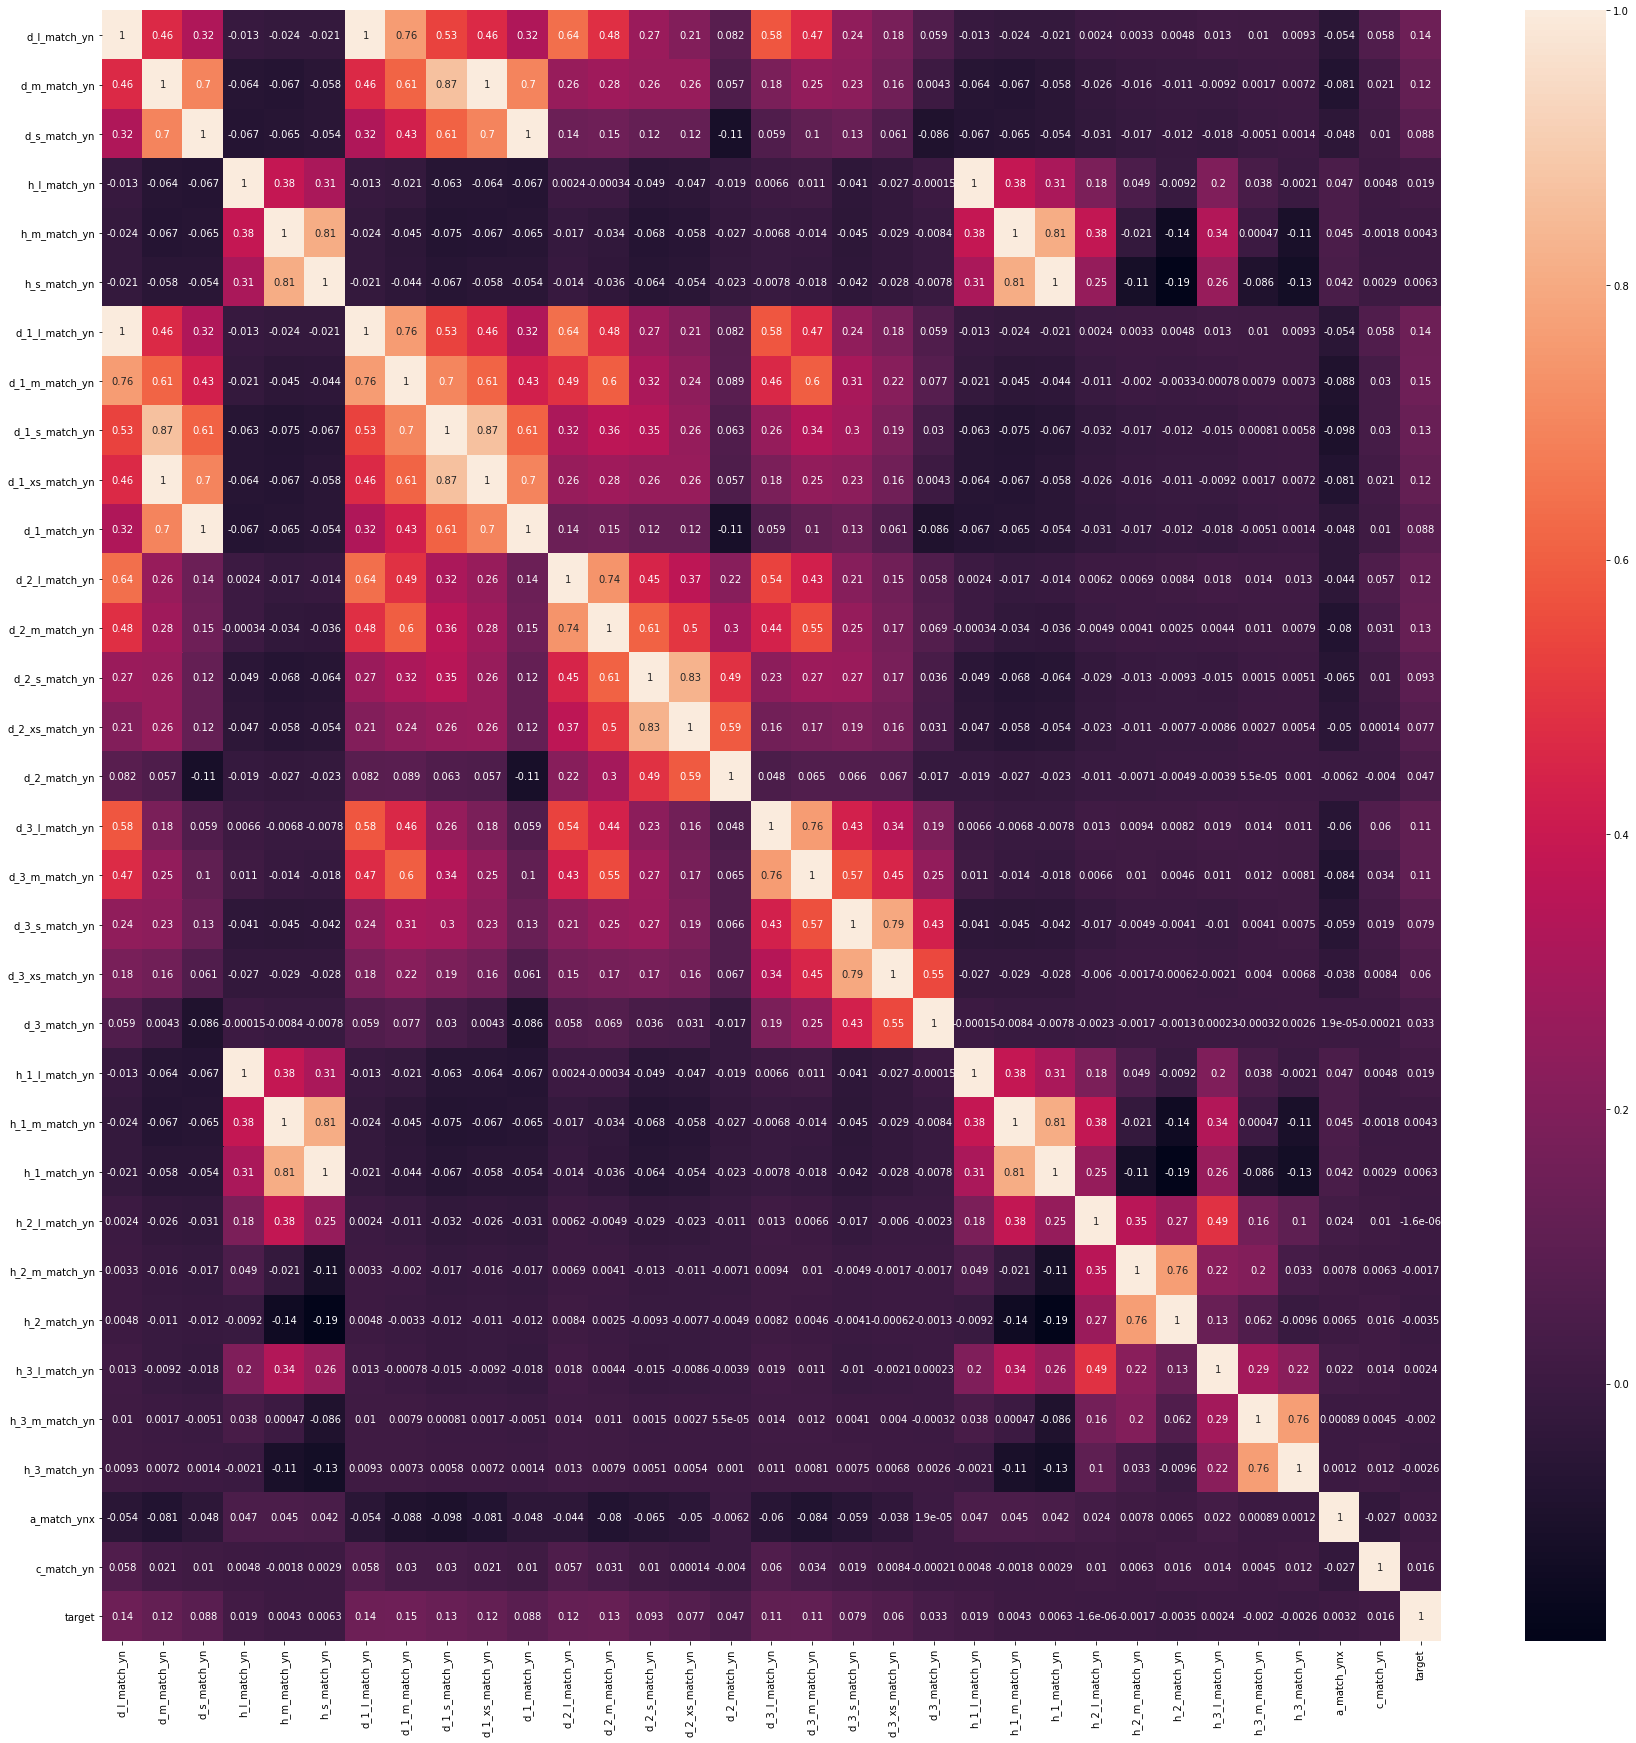

In [133]:
#스피어만

import seaborn as sns
import matplotlib.pyplot as plt

cols = list(bool_data['columns'])
cols.append('target')
 
plt.figure(figsize=(30,30)) 
corr = train[cols].corr(method = 'spearman')

sns.heatmap(corr, annot = True)

plt.show()

#plt.figure(figsize=(30,30))
#sns.heatmap(train[cols].corr(),cmap = plt.cm.RdYlBu_r,fmt = '.2f', linewidths=.5, annot=True, vmin=-0.0040, vmax = 0.3)

- 상관계수가 높은 것들을 어떻게 처리할 지 생각 (ex. d,d_1,d_2 등등의 매칭 여부를 하나의 컬럼으로 만들기 (점수제?))

# 이상치

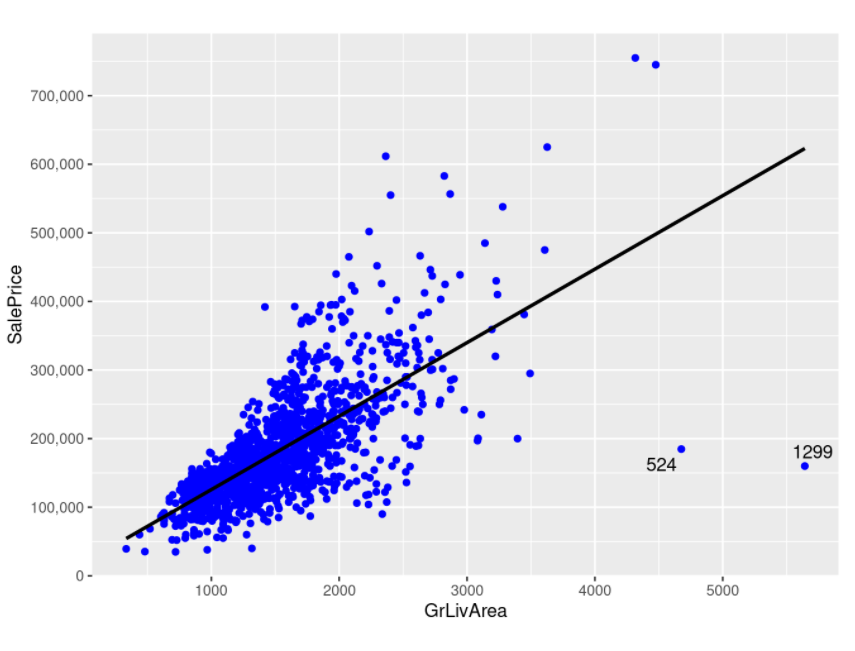

이상치의 경우 이런 방식으로 확인하고 싶었지만 target과 선형 관계에 있는 컬럼이 없는 것으로 확인돼 실패..!

# 모델링

In [ ]:
train